In [70]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from prettytable import PrettyTable

In [71]:
customer_df = pd.read_csv('../dataset/customer_classification_clean_data.csv')

In [72]:
customer_df.head()

,institution,system,data_loss_gen,data_loss_human,data_loss_machine,data_loss_hybrid,system_error_chance,feature
0,10602,1,2,3,4,1,1,2
1,10612,1,2,3,3,1,1,2
2,10597,1,2,1,1,2,1,1
3,10597,2,2,2,4,2,1,2
4,10597,1,1,1,2,1,1,1


In [73]:
customer_df.isnull().values.any()

False

In [74]:
customer_df.isnull().sum().sum()

0

In [75]:
customer_df.dtypes

institution            int64
system                 int64
data_loss_gen          int64
data_loss_human        int64
data_loss_machine      int64
data_loss_hybrid       int64
system_error_chance    int64
feature                int64
dtype: object

In [76]:

x = customer_df.drop(columns='0')
y = customer_df['0']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [78]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(x_train)
X_test_scale = scaler.fit_transform(x_test)

In [141]:
def auto_train (x,y, model_alg):
    if model_alg == 'lr':
        model = LinearRegression()
    elif model_alg == 'xgb':
        model = XGBRFRegressor()
    elif model_alg == 'rfr':
        model = RandomForestRegressor()
       
    model.fit(X_train_scale, np.log(y))
    
    return model

In [81]:
def auto_evaluate(model, x, y):
    predictions = model.predict(x)
    predictions = np.exp(predictions)
    
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    mape = mean_absolute_percentage_error(y, predictions)
    
    mse = round(mse, 2)
    mae = round(mae, 2)
    mape = round(mape, 2)
    
    return [mse, mae, mape]

In [143]:
linear = auto_train(X_train_scale, y_train, 'lr')
xgboost = auto_train(X_train_scale, y_train, 'xgb')
random_forest_reg = auto_train(X_train_scale, y_train, 'rfr')

In [89]:
linear_evaluate = auto_evaluate(linear, X_test_scale, y_test)
linear_evaluate

[0.04, 0.11, 0.08]

In [90]:
xg_evaluate = auto_evaluate(xgboost, X_test_scale, y_test)
xg_evaluate

[0.02, 0.04, 0.03]

In [91]:
forest_evalaute = auto_evaluate(random_forest_reg, X_test_scale, y_test)
forest_evalaute

[0.02, 0.04, 0.03]

In [125]:
summary = PrettyTable(['Model', 'MSE', 'MAE', 'MAPE'])

summary.add_row(['LR'] + auto_evaluate(linear, X_test_scale, y_test))
summary.add_row(['XGB'] + auto_evaluate(xgboost, X_test_scale, y_test))
summary.add_row(['RFR'] + auto_evaluate(random_forest_reg, X_test_scale, y_test))

print(summary)

+--------+------+------+------+
| Model  | MSE  | MAE  | MAPE |
+--------+------+------+------+
|   LR   | 0.04 | 0.11 | 0.08 |
|  XGB   | 0.02 | 0.04 | 0.03 |
|  RFR   | 0.02 | 0.04 | 0.03 |
| DL_MIN | 0.02 | 0.05 | 0.04 |
| DL_MAX | 0.02 | 0.05 | 0.03 |
+--------+------+------+------+


In [136]:
predict_1 = np.exp(linear.predict(X_test_scale))

In [ ]:
predict = np.exp(random_forest_reg.predict(X_test_scale))

In [ ]:
observes = 20

x_ax = range(len(y_test[:observes]))

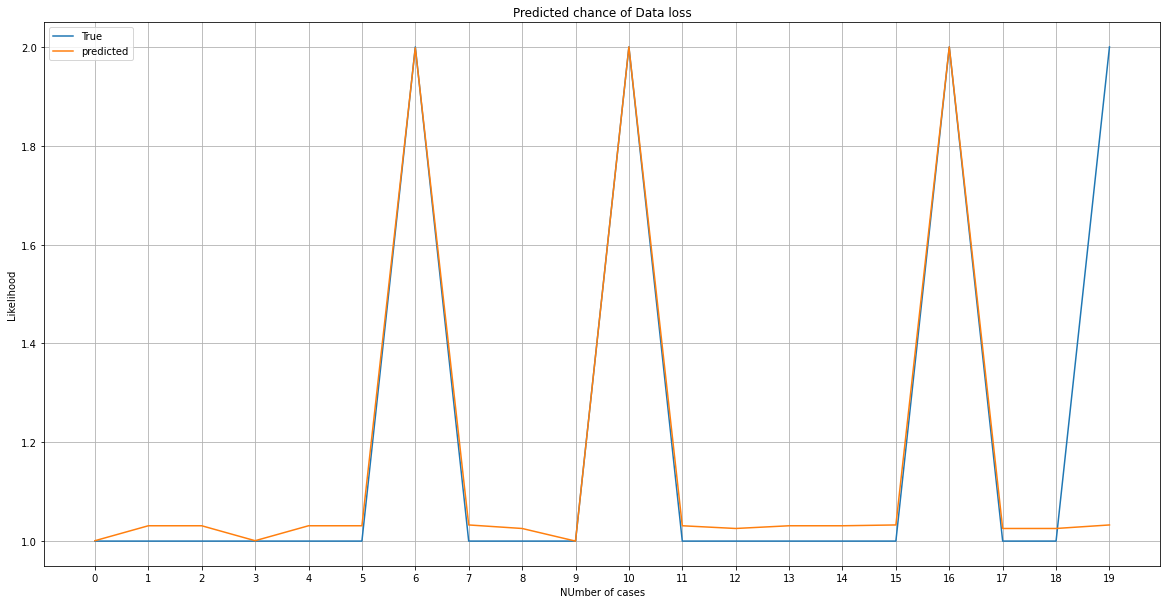

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

plt.plot(x_ax, y_test[:observes], label='True')
plt.plot(x_ax, predict[:observes], label='predicted')
plt.title("Predicted chance of Data loss")
plt.xlabel('NUmber of cases')
plt.ylabel('Likelihood')
plt.xticks(np.arange(observes))
plt.legend()
plt.grid()
plt.show()